In [30]:
%matplotlib inline
from tkinter import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import glob
import streamlit as st

from tkinter import *



First exploration - 
1) filter release_date to only the first 4 characters (year) store as year_released
2) filter year_released to popularity > 80
2) Find average danceability for each year ex: if release_date == 1990 > mean()
3) plot x = year y = avg danceability

In [31]:
path = r'C:\Users\dasan\Desktop\Repo\Project' #Read multiple CSV by pattern matching
all_files = glob.glob(path +"/*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [32]:
#Create column with only year released based of release_date
df["Year Released"] = pd.to_datetime(df['release_date'])
df["Year Released"] = df["Year Released"].dt.year


In [33]:
# Create Dataframe with only Songs with popularity +80
df_popular = df[df['popularity'] >= 80]

Next to do: User input chooses the plot with dropdown from tkinter 
            Exclude mode and key

Need to add correlation/regression? look into stats
Also add labels
Note - median may be more useful than mean // could let user choose median or mean

Notes for what to explore:
Find any relationship/intersection between any column against time and popularity against time
Look into those with interesting Correlations: unstack and sort for those above .3 in either direction, remove duplicates

To do next with that data: data viz

In [34]:
c = df_popular.corr()

s = c.unstack() #unstack to sort by value
so = s.sort_values(kind="quicksort")
so1 = so[0:8]
result1 = {} # remove duplicates
for key,value in so1.items():
    if value not in result1.values():
        result1[key] = value


In [35]:
so2 = so[228:240]

result2 = {}
for key,value in so2.items():
    if value not in result2.values():
        result2[key] = value
result1.update(result2)

Correlation for popularity
Note duration only thing correlated to year released

In [36]:
p = {**result1}
p_ = {'Popularity 80+' : result1}
dfp = pd.DataFrame(data=p_) 


Check if key or mode change correlation

In [37]:
#dataframe popular - filter by mode 0/1
df_mode_1 = df_popular[df_popular['mode'] == 1]
df_mode_0 = df_popular[df_popular['mode'] == 0]


In [38]:
#mode = 1 correlations -
cm1 = df_mode_1.corr()
cm1 = cm1.drop('mode')
cm1 = cm1.drop('mode', axis = 1) #remove nan

sm1 = cm1.unstack() #unstack to sort by value
som1 = sm1.sort_values(kind="quicksort")
som1 = som1[:]
resultm1 = {} # remove duplicates
for key,value in som1.items():
    if value not in resultm1.values():
        resultm1[key] = value
res = {key : val for key, val in resultm1.items()
                   if type(val) != int and val < -.30}



In [39]:
#mode = 1 correlations +
sm1_ = cm1.unstack() #unstack to sort by value
som1_ = sm1_.sort_values(kind="quicksort")
som1_ = som1_[:]
resultm1_ = {} # remove duplicates
for key,value in som1_.items():
    if value not in resultm1_.values():
        resultm1_[key] = value
res_ = {key : val for key, val in resultm1_.items()
                   if type(val) != int and val > .30 and val != 1}
res.update(res_)


In [40]:
#mode = 0 correlations - 
cm0 = df_mode_0.corr()
cm0 = cm0.drop('mode')
cm0 = cm0.drop('mode', axis = 1) #remove nan

sm0 = cm0.unstack() #unstack to sort by value
som0 = sm0.sort_values(kind="quicksort")
som0 = som0[:]
resultm0 = {} # remove duplicates
for key,value in som0.items():
    if value not in resultm0.values():
        resultm0[key] = value
res0 = {key : val for key, val in resultm0.items()
                   if type(val) != int and val < -.30}


In [41]:
#mode = 0 correlations +
cm0_ = df_mode_0.corr()
cm0_ = cm0_.drop('mode')
cm0_ = cm0_.drop('mode', axis = 1) #remove nan

sm0_ = cm0_.unstack() #unstack to sort by value
som0_ = sm0_.sort_values(kind="quicksort")
som0_ = som0_[:]
resultm0_ = {} # remove duplicates
for key,value in som0_.items():
    if value not in resultm0_.values():
        resultm0_[key] = value
res0_ = {key : val for key, val in resultm0_.items()
                   if type(val) != int and val > .30 and val != 1.0}
res0.update(res0_)



In [42]:
m0_ = {**res0}
m0_ = {'Mode 0/Minor' : res0}
dfm0 = pd.DataFrame(data=m0_) 
m1_ = {**res}
m1_ = {'Mode 0/Major' : res}
dfm1 = pd.DataFrame(data=m1_) 


Correlations for all keys

In [43]:
#d = {}
#for i in range(0,12):
    #d["df_key{0}".format(x)] = df_popular[df_popular['key'] == i]
df_key0 = df_popular[df_popular['key'] == 0]
df_key1 = df_popular[df_popular['key'] == 1]
df_key2 = df_popular[df_popular['key'] == 2]
df_key3 = df_popular[df_popular['key'] == 3]
df_key4 = df_popular[df_popular['key'] == 4]
df_key5 = df_popular[df_popular['key'] == 5]
df_key6 = df_popular[df_popular['key'] == 6]
df_key7 = df_popular[df_popular['key'] == 7]
df_key8 = df_popular[df_popular['key'] == 8]
df_key9 = df_popular[df_popular['key'] == 9]
df_key10 = df_popular[df_popular['key'] == 10]
df_key11 = df_popular[df_popular['key'] == 11]


#Need to automate this process to go through range(0,12)

In [44]:
#Correlations for key 0
k0 = df_key0.corr()
k0 = k0.drop('key')
k0 = k0.drop('key', axis = 1) #remove nan

uk0 = k0.unstack() #unstack to sort by value
suk0 = uk0.sort_values(kind="quicksort")
suk0 = suk0[:]
resultk0 = {} # remove duplicates
for key,value in suk0.items():
    if value not in resultk0.values():
        resultk0[key] = value
resk0 = {key : val for key, val in resultk0.items()
                   if type(val) != int and val < -.30}
reskk0_ = {key : val for key, val in resultk0.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk0.update(reskk0_)


#Correlations for key 1
k1 = df_key1.corr()
k1 = k1.drop('key')
k1 = k1.drop('key', axis = 1) #remove nan

uk1 = k1.unstack() #unstack to sort by value
suk1 = uk1.sort_values(kind="quicksort")
suk1 = suk1[:]
resultk1 = {} # remove duplicates
for key,value in suk1.items():
    if value not in resultk1.values():
        resultk1[key] = value
resk1 = {key : val for key, val in resultk1.items()
                   if type(val) != int and val < -.30}
reskk1_ = {key : val for key, val in resultk1.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk1.update(reskk1_)


#Correlations for key 2
k2 = df_key2.corr()
k2 = k2.drop('key')
k2 = k2.drop('key', axis = 1) #remove nan

uk2 = k2.unstack() #unstack to sort by value
suk2 = uk2.sort_values(kind="quicksort")
suk2 = suk2[:]
resultk2 = {} # remove duplicates
for key,value in suk2.items():
    if value not in resultk2.values():
        resultk2[key] = value
resk2 = {key : val for key, val in resultk2.items()
                   if type(val) != int and val < -.30}
reskk2_ = {key : val for key, val in resultk2.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk2.update(reskk2_)

#Correlations for key 3
k3 = df_key3.corr()
k3 = k3.drop('key')
k3 = k3.drop('key', axis = 1) #remove nan

uk3 = k3.unstack() #unstack to sort by value
suk3 = uk3.sort_values(kind="quicksort")
suk3 = suk3[:]
resultk3 = {} # remove duplicates
for key,value in suk3.items():
    if value not in resultk3.values():
        resultk3[key] = value
resk3 = {key : val for key, val in resultk3.items()
                   if type(val) != int and val < -.30}
reskk3_ = {key : val for key, val in resultk3.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk3.update(reskk3_)


#Correlations for key 4
k4 = df_key4.corr()
k4 = k4.drop('key')
k4 = k4.drop('key', axis = 1) #remove nan

uk4 = k4.unstack() #unstack to sort by value
suk4 = uk4.sort_values(kind="quicksort")
suk4 = suk4[:]
resultk4 = {} # remove duplicates
for key,value in suk4.items():
    if value not in resultk4.values():
        resultk4[key] = value
resk4 = {key : val for key, val in resultk4.items()
                   if type(val) != int and val < -.30}
reskk4_ = {key : val for key, val in resultk4.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk4.update(reskk4_)


#Correlations for key 5
k5 = df_key5.corr()
k5 = k5.drop('key')
k5 = k5.drop('key', axis = 1) #remove nan

uk5 = k5.unstack() #unstack to sort by value
suk5 = uk5.sort_values(kind="quicksort")
suk5 = suk5[:]
resultk5 = {} # remove duplicates
for key,value in suk5.items():
    if value not in resultk5.values():
        resultk5[key] = value
resk5 = {key : val for key, val in resultk5.items()
                   if type(val) != int and val < -.30}
reskk5_ = {key : val for key, val in resultk5.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk5.update(reskk5_)


#Correlations for key 6
k6 = df_key6.corr()
k6 = k6.drop('key')
k6 = k6.drop('key', axis = 1) #remove nan

uk6 = k6.unstack() #unstack to sort by value
suk6 = uk6.sort_values(kind="quicksort")
suk6 = suk6[:]
resultk6 = {} # remove duplicates
for key,value in suk6.items():
    if value not in resultk6.values():
        resultk6[key] = value
resk6 = {key : val for key, val in resultk6.items()
                   if type(val) != int and val < -.30}
reskk6_ = {key : val for key, val in resultk6.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk6.update(reskk6_)

#Correlations for key 7
k7 = df_key7.corr()
k7 = k7.drop('key')
k7 = k7.drop('key', axis = 1) #remove nan

uk7 = k7.unstack() #unstack to sort by value
suk7 = uk7.sort_values(kind="quicksort")
suk7 = suk7[:]
resultk7 = {} # remove duplicates
for key,value in suk3.items():
    if value not in resultk7.values():
        resultk7[key] = value
resk7 = {key : val for key, val in resultk7.items()
                   if type(val) != int and val < -.30}
reskk7_ = {key : val for key, val in resultk7.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk7.update(reskk7_)

#Correlations for key 8
k8 = df_key8.corr()
k8 = k8.drop('key')
k8 = k8.drop('key', axis = 1) #remove nan

uk8 = k8.unstack() #unstack to sort by value
suk8 = uk8.sort_values(kind="quicksort")
suk8 = suk8[:]
resultk8 = {} # remove duplicates
for key,value in suk8.items():
    if value not in resultk8.values():
        resultk8[key] = value
resk8 = {key : val for key, val in resultk8.items()
                   if type(val) != int and val < -.30}
reskk8_ = {key : val for key, val in resultk8.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk8.update(reskk8_)

#Correlations for key 9
k9 = df_key9.corr()
k9 = k9.drop('key')
k9 = k9.drop('key', axis = 1) #remove nan

uk9 = k9.unstack() #unstack to sort by value
suk9 = uk9.sort_values(kind="quicksort")
suk9 = suk9[:]
resultk9 = {} # remove duplicates
for key,value in suk9.items():
    if value not in resultk9.values():
        resultk9[key] = value
resk9 = {key : val for key, val in resultk9.items()
                   if type(val) != int and val < -.30}
reskk9_ = {key : val for key, val in resultk9.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk9.update(reskk9_)

#Correlations for key 10
k10 = df_key10.corr()
k10 = k10.drop('key')
k10 = k10.drop('key', axis = 1) #remove nan

uk10 = k10.unstack() #unstack to sort by value
suk10 = uk10.sort_values(kind="quicksort")
suk10 = suk10[:]
resultk10 = {} # remove duplicates
for key,value in suk10.items():
    if value not in resultk10.values():
        resultk10[key] = value
resk10 = {key : val for key, val in resultk10.items()
                   if type(val) != int and val < -.30}
reskk10_ = {key : val for key, val in resultk10.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk10.update(reskk10_)

#Correlations for key 11
k11 = df_key11.corr()
k11 = k11.drop('key')
k11 = k11.drop('key', axis = 1) #remove nan

uk11 = k11.unstack() #unstack to sort by value
suk11 = uk11.sort_values(kind="quicksort")
suk11 = suk11[:]
resultk11 = {} # remove duplicates
for key,value in suk11.items():
    if value not in resultk11.values():
        resultk11[key] = value
resk11 = {key : val for key, val in resultk11.items()
                   if type(val) != int and val < -.30}
reskk11_ = {key : val for key, val in resultk11.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk11.update(reskk11_)




In [45]:
#dataframe for k0 = dfk0
k0_ = {**resk0}
k0_ = {'key0/C' : resk0}
dfk0 = pd.DataFrame(data=k0_) 

k1_ = {**resk1}
k1_ = {'key1/C#' : resk1}
dfk1 = pd.DataFrame(data=k1_) 

k2_ = {**resk0}
k2_ = {'key2/D' : resk2}
dfk2 = pd.DataFrame(data=k2_) 

k3_ = {**resk3}
k3_ = {'key3/D#' : resk3}
dfk3 = pd.DataFrame(data=k3_) 


k4_ = {**resk4}
k4_ = {'key4/E' : resk4}
dfk4 = pd.DataFrame(data=k4_) 


k5_ = {**resk5}
k5_ = {'key5/F' : resk5}
dfk5 = pd.DataFrame(data=k5_) 


k6_ = {**resk6}
k6_ = {'key6/F#' : resk6}
dfk6 = pd.DataFrame(data=k6_) 


k7_ = {**resk7}
k7_ = {'key7/G' : resk7}
dfk7 = pd.DataFrame(data=k7_) 


k8_ = {**resk8}
k8_ = {'key8/G#' : resk8}
dfk8 = pd.DataFrame(data=k8_) 

k9_ = {**resk9}
k9_ = {'key9/A' : resk9}
dfk9 = pd.DataFrame(data=k9_) 


k10_ = {**resk10}
k10_ = {'key10/A#' : resk10}
dfk10 = pd.DataFrame(data=k10_) 

k11_ = {**resk11}
k11_ = {'key11/B' : resk11}
dfk11 = pd.DataFrame(data=k11_) 

Find way to display key data
Note: maybe drop down to select key and will show the corr data


Notes on Correlations
------------------------
There are many correlations for key, maybe filter down to large .5+

Mode has few correlationss keep at low .3+

So Far Done
-----------------------
1) Graph creation for variable over time
    // need to add correlation lines

2) Graph for popularity

3) Graph for Mode

4) Graph for Key

//////
Need to figure out what to do with correlation data, How to display


If find out how to loop through creating new dataframes maybe do filter by mode and key at same time

Graphs for every year

Pop 80+ Corre .3 // valence,loudness | valence,danceability | loudness,instrumentalness | loudness,energy | loudness,acousticness |
explicit, speechiness | explicit, danceability | energy, valence |
duration_ms, Year Released | acousticness,energy

Only Year Released correlation is duration_ms

<AxesSubplot:xlabel='loudness', ylabel='energy'>

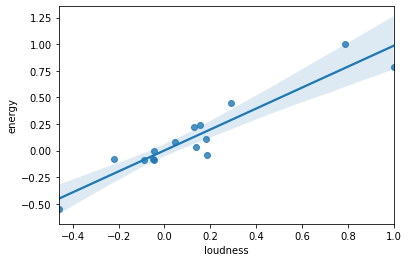

In [46]:
dfc = df_popular.corr()
#ax = sns.regplot(x="energy", y="loudness", data=dfc)
sns.regplot(x=k0['loudness'],y=k0['energy'])


Panels GUI // Panel really hard to get working
Try streamlit -- create CSVs for dataframes for streamlit user manipulation ++ code ordinal features
x.to_csv apply to all DFs

In [47]:
#all csvs for keys
dfk0.to_csv('dfk0.csv')
dfk1.to_csv('dfk1.csv')
dfk2.to_csv('dfk2.csv')
dfk3.to_csv('dfk3.csv')
dfk4.to_csv('dfk4.csv')
dfk5.to_csv('dfk5.csv')
dfk6.to_csv('dfk6.csv')
dfk7.to_csv('dfk7.csv')
dfk8.to_csv('dfk8.csv')
dfk9.to_csv('dfk9.csv')
dfk10.to_csv('dfk10.csv')
dfk11.to_csv('dfk11.csv')

In [48]:
#CSV for mode
dfm0.to_csv('dfm0.csv')
dfm1.to_csv('dfm1.csv')


In [49]:
#CSV for popularity 80+ unfiltered
dfp.to_csv('dfp.csv')

In [50]:
#Mode 0 by key df_mode0
d_lst = []
for i in range(0,12):
    d_lst.append(df_mode_0[df_mode_0['key'] == i])

corr_lst = []
for df_key in d_lst:
    #
    k = df_key.corr()
    k = k.drop('key')
    k = k.drop('key', axis = 1) #remove nan

    uk = k.unstack() #unstack to sort by value
    suk = uk.sort_values(kind="quicksort")

    resultk = {} # remove duplicates
    for key,value in suk.items():
        if value not in resultk.values():
            resultk[key] = value


    resk = {key : val for key, val in resultk.items()  # positive
                    if type(val) != int and val < -.30}
    kneg = {key : val for key, val in resultk.items() # negative
                    if type(val) != int and val > .30 and val != 1.0}
    resk.update(kneg) # add negs

    corr_lst.append(resk) 

keys = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']

# make list of dataframes for later plotting etc.
df_lst = []
for i, resk in enumerate(corr_lst):
    k = {**resk}
    k = {f"key{i}/{keys[i]}" : resk}
    df = pd.DataFrame(data=k)
    df_lst.append(df)



dfm0k0 = pd.DataFrame(data=df_lst[0]) 
dfm0k0.to_csv('dfm0k0.csv')

dfm0k1 = pd.DataFrame(data=df_lst[1]) 
dfm0k1.to_csv('dfm0k1.csv')

dfm0k2 = pd.DataFrame(data=df_lst[2]) 
dfm0k2.to_csv('dfm0k2.csv')

dfm0k3 = pd.DataFrame(data=df_lst[3]) 
dfm0k3.to_csv('dfm0k3.csv')

dfm0k4 = pd.DataFrame(data=df_lst[4]) 
dfm0k4.to_csv('dfm0k4.csv')

dfm0k5 = pd.DataFrame(data=df_lst[5]) 
dfm0k5.to_csv('dfm0k5.csv')

dfm0k6 = pd.DataFrame(data=df_lst[6]) 
dfm0k6.to_csv('dfm0k6.csv')

dfm0k7 = pd.DataFrame(data=df_lst[7]) 
dfm0k7.to_csv('dfm0k7.csv')

dfm0k8 = pd.DataFrame(data=df_lst[8]) 
dfm0k8.to_csv('dfm0k8.csv')

dfm0k9 = pd.DataFrame(data=df_lst[9]) 
dfm0k9.to_csv('dfm0k9.csv')

dfm0k10 = pd.DataFrame(data=df_lst[10]) 
dfm0k10.to_csv('dfm0k10.csv')

dfm0k11 = pd.DataFrame(data=df_lst[11]) 
dfm0k11.to_csv('dfm0k11.csv')

In [51]:
#Mode 1 by key df_mode0
d_lst = []
for i in range(0,12):
    d_lst.append(df_mode_1[df_mode_1['key'] == i])

corr_lst = []
for df_key in d_lst:
    #
    k = df_key.corr()
    k = k.drop('key')
    k = k.drop('key', axis = 1) #remove nan

    uk = k.unstack() #unstack to sort by value
    suk = uk.sort_values(kind="quicksort")

    resultk = {} # remove duplicates
    for key,value in suk.items():
        if value not in resultk.values():
            resultk[key] = value


    resk = {key : val for key, val in resultk.items()  # positive
                    if type(val) != int and val < -.30}
    kneg = {key : val for key, val in resultk.items() # negative
                    if type(val) != int and val > .30 and val != 1.0}
    resk.update(kneg) # add negs

    corr_lst.append(resk) 

keys = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']

# make list of dataframes for later plotting etc.
df_lst = []
for i, resk in enumerate(corr_lst):
    k = {**resk}
    k = {f"key{i}/{keys[i]}" : resk}
    df = pd.DataFrame(data=k)
    df_lst.append(df)
df_lst

dfm1k0 = pd.DataFrame(data=df_lst[0]) 
dfm1k0.to_csv('dfm1k0.csv')

dfm1k1 = pd.DataFrame(data=df_lst[1]) 
dfm1k1.to_csv('dfm1k1.csv')

dfm1k2 = pd.DataFrame(data=df_lst[2]) 
dfm1k2.to_csv('dfm1k2.csv')

dfm1k3 = pd.DataFrame(data=df_lst[3]) 
dfm1k3.to_csv('dfm1k3.csv')

dfm1k4 = pd.DataFrame(data=df_lst[4]) 
dfm1k4.to_csv('dfm1k4.csv')

dfm1k5 = pd.DataFrame(data=df_lst[5]) 
dfm1k5.to_csv('dfm1k5.csv')

dfm1k6 = pd.DataFrame(data=df_lst[6]) 
dfm1k6.to_csv('dfm1k6.csv')

dfm1k7 = pd.DataFrame(data=df_lst[7]) 
dfm1k7.to_csv('dfm1k7.csv')

dfm1k8 = pd.DataFrame(data=df_lst[8]) 
dfm1k8.to_csv('dfm1k8.csv')

dfm1k9 = pd.DataFrame(data=df_lst[9]) 
dfm1k9.to_csv('dfm1k9.csv')

dfm1k10 = pd.DataFrame(data=df_lst[10]) 
dfm1k10.to_csv('dfm1k10.csv')

dfm1k11 = pd.DataFrame(data=df_lst[11]) 
dfm1k11.to_csv('dfm1k11.csv')
